#**Accident Severity Prediction**







#Exploratory Data Analysis - EDA

In [ ]:
from google.colab import files
files.upload()  # اختر ملف kaggle.json من جهازك


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghadalmangor","key":"f77d043e602f1ed8c130d8caa1616b44"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents
!unzip -q us-accidents.zip


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 86% 562M/653M [00:00<00:00, 1.18GB/s]
100% 653M/653M [00:00<00:00, 1.16GB/s]


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
import pandas as pd

data = pd.read_csv('US_Accidents_March23.csv', nrows=400000)


In [ ]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,A-400008,Source2,3,2017-04-25 12:15:27,2017-04-25 12:49:00,37.516037,-121.940689,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399996,A-400009,Source2,3,2017-04-25 12:13:06,2017-04-25 12:44:00,37.458626,-121.924133,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399997,A-400010,Source2,2,2017-04-25 12:14:47,2017-04-25 12:48:00,37.355961,-121.868294,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
399998,A-400011,Source2,2,2017-04-25 12:32:34,2017-04-25 13:03:00,37.452118,-122.126907,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
print(data.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     400000 non-null  object 
 1   Source                 400000 non-null  object 
 2   Severity               400000 non-null  int64  
 3   Start_Time             400000 non-null  object 
 4   End_Time               400000 non-null  object 
 5   Start_Lat              400000 non-null  float64
 6   Start_Lng              400000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           400000 non-null  float64
 10  Description            400000 non-null  object 
 11  Street                 400000 non-null  object 
 12  City                   399981 non-null  object 
 13  County                 400000 non-null  object 
 14  State                  400000 non-nu

In [ ]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,400000.000000,400000.000000,400000.000000,0.0,0.0,400000.000000,394085.000000,59095.000000,393491.000000,395353.000000,391221.000000,325829.000000,42045.000000
mean,2.367725,35.968671,-97.772576,NaN,NaN,0.055014,63.099615,29.591385,64.981191,30.022115,9.197097,8.798980,0.062951
std,0.484870,5.009050,18.347604,NaN,NaN,0.713742,17.483801,15.295682,21.401962,0.249542,2.197655,5.598683,0.531045
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.830654,-118.134361,NaN,NaN,0.000000,53.100000,21.200000,50.000000,29.920000,10.000000,5.800000,0.000000
50%,2.000000,34.299267,-95.563095,NaN,NaN,0.010000,64.900000,30.400000,66.000000,30.020000,10.000000,8.100000,0.010000
75%,3.000000,40.124294,-81.637751,NaN,NaN,0.010000,75.900000,37.700000,83.000000,30.130000,10.000000,11.500000,0.030000
max,4.000000,48.199970,-70.571518,NaN,NaN,84.410000,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000


## Data Cleaning & Preprocessing

###Missing Values

In [ ]:
data.isna().mean()

,0
ID,0.000000
Source,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,1.000000
End_Lng,1.000000
Distance(mi),0.000000


In [ ]:
missing_ratio = data.isna().mean() # سيعرض نسبة القيم الناقصة فقط للأعمدة التي فيها قيم ناقصة، مرتبة تنازليًا.
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))

End_Lat                  1.000000
End_Lng                  1.000000
Precipitation(in)        0.894887
Wind_Chill(F)            0.852263
Wind_Speed(mph)          0.185427
Visibility(mi)           0.021948
Weather_Condition        0.020520
Humidity(%)              0.016272
Temperature(F)           0.014788
Pressure(in)             0.011617
Wind_Direction           0.008075
Weather_Timestamp        0.008023
Airport_Code             0.000110
Zipcode                  0.000107
Timezone                 0.000107
City                     0.000048
Sunrise_Sunset           0.000048
Civil_Twilight           0.000048
Nautical_Twilight        0.000048
Astronomical_Twilight    0.000048
dtype: float64


In [ ]:
missing = data.isna().sum()
missing = missing[missing > 0]  # فقط الأعمدة التي تحتوي على قيم ناقصة
print(missing)

End_Lat                  400000
End_Lng                  400000
City                         19
Zipcode                      43
Timezone                     43
Airport_Code                 44
Weather_Timestamp          3209
Temperature(F)             5915
Wind_Chill(F)            340905
Humidity(%)                6509
Pressure(in)               4647
Visibility(mi)             8779
Wind_Direction             3230
Wind_Speed(mph)           74171
Precipitation(in)        357955
Weather_Condition          8208
Sunrise_Sunset               19
Civil_Twilight               19
Nautical_Twilight            19
Astronomical_Twilight        19
dtype: int64


In [ ]:
#الطريقة البسيطة لمعرفة الأعمدة التي تحتوي على قيم ناقصة:
#يُرجع عدد القيم الناقصة في كل عمود.

#أي عمود يكون له قيمة أكبر من 0 → يعني يحتوي على قيم ناقصة.

data.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,400000
End_Lng,400000
Distance(mi),0


In [ ]:
'Number' in data.columns

False

In [ ]:
null_columns = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']

data = data.drop(null_columns, axis=1)

In [ ]:
data.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0


In [ ]:
data = data.dropna(axis=0).reset_index(drop=True)

In [ ]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [ ]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
2,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320980,A-400007,Source2,2,2017-04-25 12:08:49,2017-04-25 12:38:27,37.352116,-122.059219,0.01,Accident on Fremont Ave at Bernardo Ave.,S Bernardo Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
320981,A-400008,Source2,3,2017-04-25 12:15:27,2017-04-25 12:49:00,37.516037,-121.940689,0.01,Right hand shoulder blocked due to accident on...,I-680 S,...,False,False,False,False,False,False,Day,Day,Day,Day
320982,A-400009,Source2,3,2017-04-25 12:13:06,2017-04-25 12:44:00,37.458626,-121.924133,0.01,Accident on I-880 Southbound at Exit 10 Dixon ...,Nimitz Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day
320983,A-400010,Source2,2,2017-04-25 12:14:47,2017-04-25 12:48:00,37.355961,-121.868294,0.01,Right hand shoulder blocked due to accident on...,Bayshore Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day


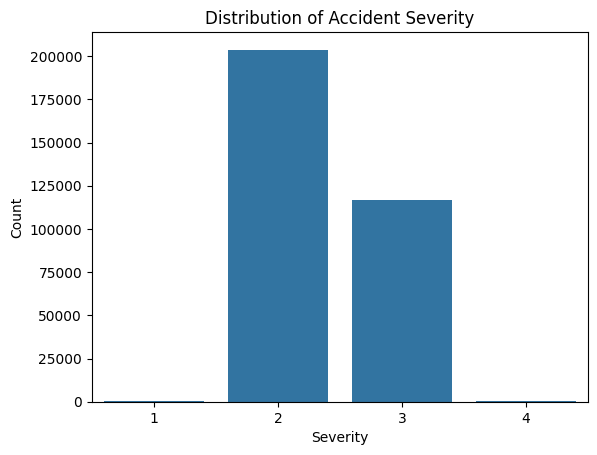

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


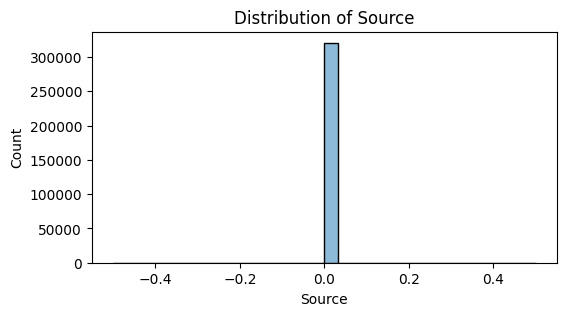

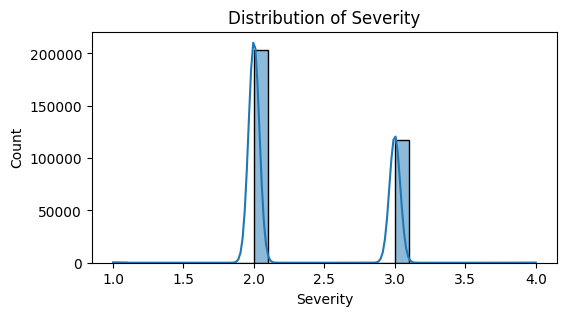

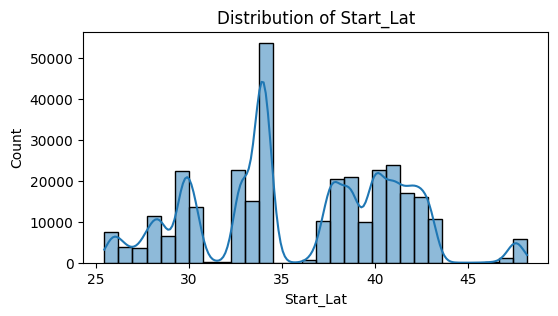

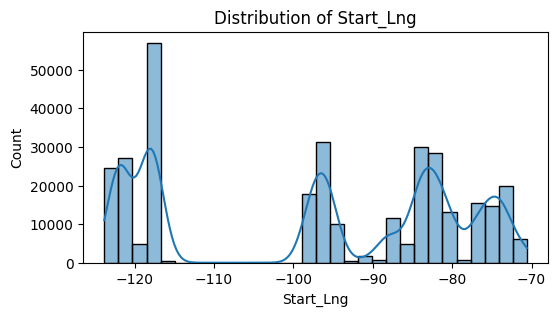

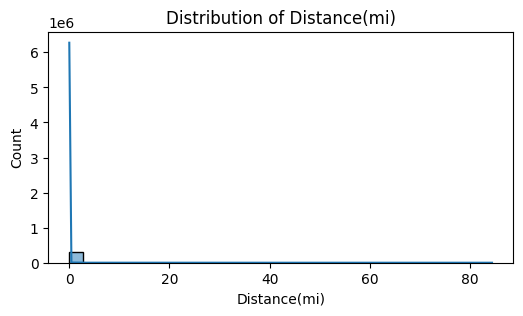

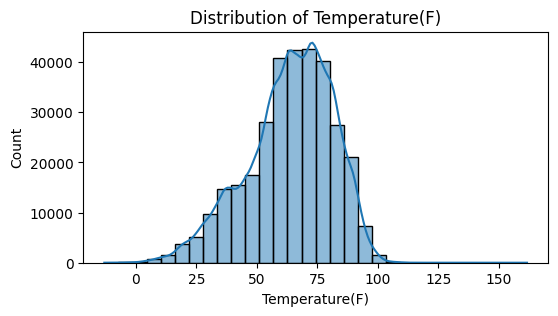

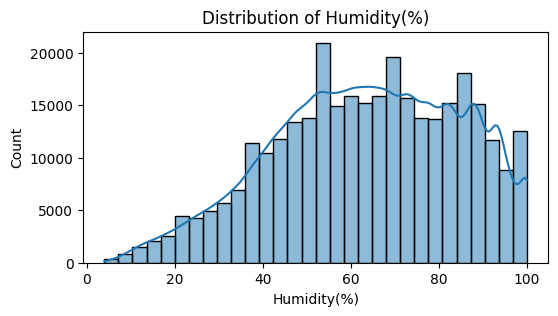

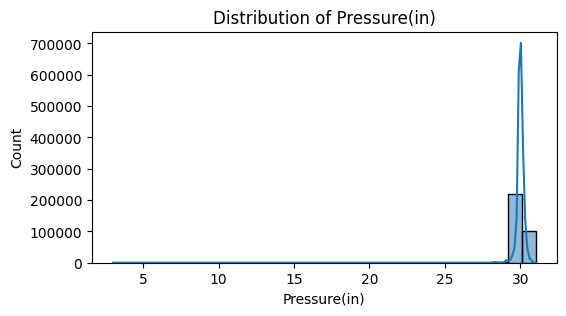

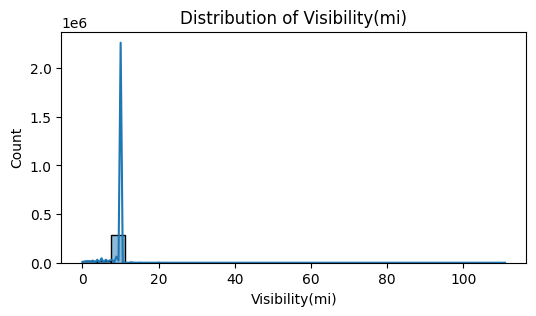

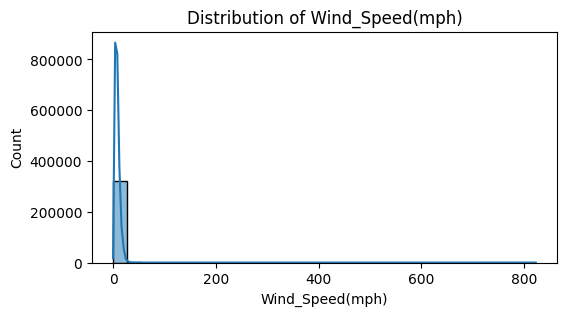

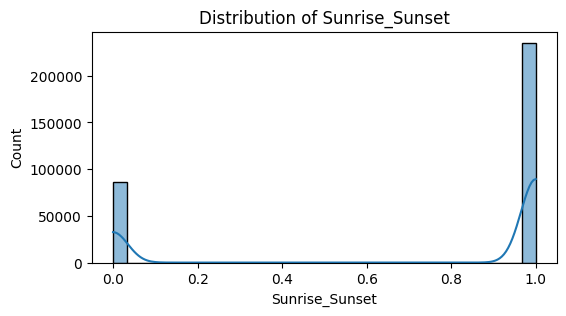

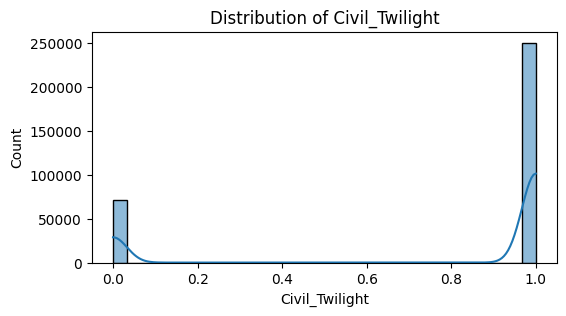

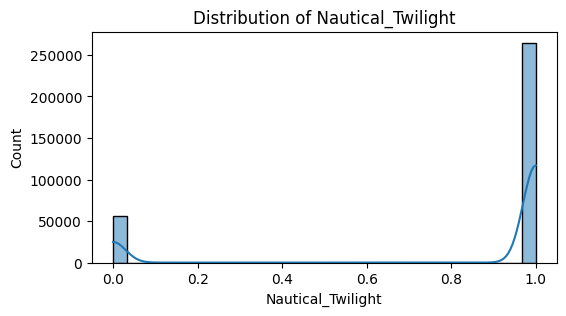

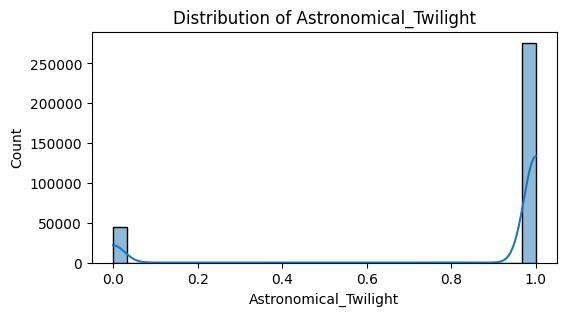

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


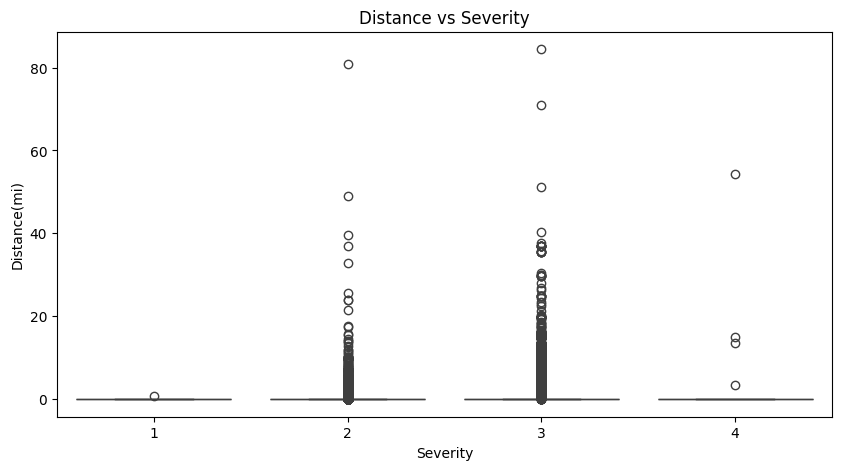

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Severity', y='Distance(mi)', data=data)
plt.title('Distance vs Severity')
plt.show()


#Unnecessary Columns

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'ID': 320985,
 'Source': 2,
 'Start_Time': 316633,
 'End_Time': 314443,
 'Description': 236516,
 'Street': 36216,
 'City': 4024,
 'County': 548,
 'State': 28,
 'Zipcode': 57076,
 'Country': 1,
 'Timezone': 4,
 'Airport_Code': 638,
 'Weather_Timestamp': 78674,
 'Wind_Direction': 23,
 'Weather_Condition': 67,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2}

In [ ]:
unneeded_columns = ['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country']

data = data.drop(unneeded_columns, axis=1)

In [ ]:
data

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Clermont,OH,US/Eastern,...,False,False,False,False,True,False,Night,Night,Day,Day
1,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Montgomery,OH,US/Eastern,...,False,False,False,False,False,False,Night,Day,Day,Day
2,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Montgomery,OH,US/Eastern,...,False,False,False,False,True,False,Day,Day,Day,Day
3,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
4,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Montgomery,OH,US/Eastern,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320980,Source2,2,2017-04-25 12:08:49,2017-04-25 12:38:27,37.352116,-122.059219,0.01,Santa Clara,CA,US/Pacific,...,False,False,False,False,True,False,Day,Day,Day,Day
320981,Source2,3,2017-04-25 12:15:27,2017-04-25 12:49:00,37.516037,-121.940689,0.01,Alameda,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day
320982,Source2,3,2017-04-25 12:13:06,2017-04-25 12:44:00,37.458626,-121.924133,0.01,Alameda,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day
320983,Source2,2,2017-04-25 12:14:47,2017-04-25 12:48:00,37.355961,-121.868294,0.01,Santa Clara,CA,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

In [ ]:
data['Start_Time_Month'] = get_months(data, 'Start_Time')
data['Start_Time_Year'] = get_years(data, 'Start_Time')

data['End_Time_Month'] = get_months(data, 'End_Time')
data['End_Time_Year'] = get_years(data, 'End_Time')

data['Weather_Timestamp_Month'] = get_months(data, 'Weather_Timestamp')
data['Weather_Timestamp_Year'] = get_years(data, 'Weather_Timestamp')


data = data.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [ ]:
data

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),County,State,Timezone,Airport_Code,Temperature(F),...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,End_Time_Month,End_Time_Year,Weather_Timestamp_Month,Weather_Timestamp_Year
0,Source2,2,39.063148,-84.032608,0.01,Clermont,OH,US/Eastern,KI69,36.0,...,Night,Night,Day,Day,02,2016,02,2016,02,2016
1,Source2,3,39.747753,-84.205582,0.01,Montgomery,OH,US/Eastern,KDAY,35.1,...,Night,Day,Day,Day,02,2016,02,2016,02,2016
2,Source2,2,39.627781,-84.188354,0.01,Montgomery,OH,US/Eastern,KMGY,36.0,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
3,Source2,3,40.100590,-82.925194,0.01,Franklin,OH,US/Eastern,KCMH,37.9,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
4,Source2,2,39.758274,-84.230507,0.00,Montgomery,OH,US/Eastern,KDAY,34.0,...,Day,Day,Day,Day,02,2016,02,2016,02,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320980,Source2,2,37.352116,-122.059219,0.01,Santa Clara,CA,US/Pacific,KNUQ,63.0,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
320981,Source2,3,37.516037,-121.940689,0.01,Alameda,CA,US/Pacific,KNUQ,63.0,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
320982,Source2,3,37.458626,-121.924133,0.01,Alameda,CA,US/Pacific,KPAO,64.4,...,Day,Day,Day,Day,04,2017,04,2017,04,2017
320983,Source2,2,37.355961,-121.868294,0.01,Santa Clara,CA,US/Pacific,KRHV,64.4,...,Day,Day,Day,Day,04,2017,04,2017,04,2017


#Encoding

In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Source': 2,
 'County': 548,
 'State': 28,
 'Timezone': 4,
 'Airport_Code': 638,
 'Wind_Direction': 23,
 'Weather_Condition': 67,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2,
 'Start_Time_Month': 12,
 'Start_Time_Year': 2,
 'End_Time_Month': 12,
 'End_Time_Year': 2,
 'Weather_Timestamp_Month': 12,
 'Weather_Timestamp_Year': 2}

In [ ]:
data = onehot_encode(
    data,
    columns=['County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition'],
    prefixes=['SI', 'CO', 'ST', 'TZ', 'AC', 'WD', 'WC']
)

In [ ]:
data

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,WD_Snow,WD_Snow Grains,WD_Snow Showers,WD_Squalls,WD_T-Storm,WD_Thunder,WD_Thunder in the Vicinity,WD_Thunderstorm,WD_Thunderstorms and Rain,WD_Widespread Dust
0,Source2,2,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,...,False,False,False,False,False,False,False,False,False,False
1,Source2,3,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,...,False,False,False,False,False,False,False,False,False,False
2,Source2,2,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,...,False,False,False,False,False,False,False,False,False,False
3,Source2,3,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,...,False,False,False,False,False,False,False,False,False,False
4,Source2,2,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320980,Source2,2,37.352116,-122.059219,0.01,63.0,58.0,30.12,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320981,Source2,3,37.516037,-121.940689,0.01,63.0,58.0,30.12,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320982,Source2,3,37.458626,-121.924133,0.01,64.4,59.0,30.11,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320983,Source2,2,37.355961,-121.868294,0.01,64.4,49.0,30.13,10.0,9.2,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def get_binary_column(df, column):
    if column == 'Source':
        return df[column].apply(lambda x: 1 if x == 'MapQuest' else 0)
    else:
        return df[column].apply(lambda x: 1 if x == 'Day' else 0)


In [ ]:
data['Source'] = get_binary_column(data, 'Source')

data['Sunrise_Sunset'] = get_binary_column(data, 'Sunrise_Sunset')
data['Civil_Twilight'] = get_binary_column(data, 'Civil_Twilight')
data['Nautical_Twilight'] = get_binary_column(data, 'Nautical_Twilight')
data['Astronomical_Twilight'] = get_binary_column(data, 'Astronomical_Twilight')

In [ ]:
data

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,WD_Snow,WD_Snow Grains,WD_Snow Showers,WD_Squalls,WD_T-Storm,WD_Thunder,WD_Thunder in the Vicinity,WD_Thunderstorm,WD_Thunderstorms and Rain,WD_Widespread Dust
0,0,2,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,...,False,False,False,False,False,False,False,False,False,False
1,0,3,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.6,...,False,False,False,False,False,False,False,False,False,False
2,0,2,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,...,False,False,False,False,False,False,False,False,False,False
3,0,3,40.100590,-82.925194,0.01,37.9,97.0,29.63,7.0,3.5,...,False,False,False,False,False,False,False,False,False,False
4,0,2,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320980,0,2,37.352116,-122.059219,0.01,63.0,58.0,30.12,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320981,0,3,37.516037,-121.940689,0.01,63.0,58.0,30.12,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320982,0,3,37.458626,-121.924133,0.01,64.4,59.0,30.11,10.0,16.1,...,False,False,False,False,False,False,False,False,False,False
320983,0,2,37.355961,-121.868294,0.01,64.4,49.0,30.13,10.0,9.2,...,False,False,False,False,False,False,False,False,False,False


#Splitting/Scaling

In [ ]:
y = data['Severity'].copy()

In [ ]:
X = data.drop('Severity', axis=1).copy()

In [ ]:
y.unique()

array([2, 3, 1, 4])

In [ ]:
y = y - 1

In [ ]:
X = X.astype(float)

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
X.shape

(320985, 1340)

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.7601 - loss: 0.5149 - val_accuracy: 0.7742 - val_loss: 0.4619 - learning_rate: 0.0010
Epoch 2/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.7886 - loss: 0.4395 - val_accuracy: 0.7832 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 3/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.7943 - loss: 0.4299 - val_accuracy: 0.7886 - val_loss: 0.4451 - learning_rate: 0.0010
Epoch 4/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.7957 - loss: 0.4249 - val_accuracy: 0.7874 - val_loss: 0.4456 - learning_rate: 0.0010
Epoch 5/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.7976 - loss: 0.4190 - val_accuracy: 0.7864 - val_loss: 0.4448 - learning_rate: 0.0010
Epoch 6/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8022 - loss: 0.4135 - val_accuracy: 0.7862 - val_loss: 0.4459 - learning_rate: 0.0010
Epoch 7/20
5618/5618 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.8

In [ ]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.792493999004364
